In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
client = MongoClient('mongodb://localhost:27017/')
db = client['TCCMLRisk']
collection = db['vehicles-dataset']

documents = collection.find()  


In [6]:
dataset = pd.DataFrame(documents)

print(dataset.head())

                        _id        id    pesid data_inversa     dia_semana  \
0  672672227e1ad798bfe77372  571774.0  1268985   2024-01-01  segunda_feira   
1  672672227e1ad798bfe77373  571779.0  1268998   2024-01-01  segunda_feira   
2  672672227e1ad798bfe77374  571779.0  1268999   2024-01-01  segunda_feira   
3  672672227e1ad798bfe77375  571779.0  1269000   2024-01-01  segunda_feira   
4  672672227e1ad798bfe77376  571779.0  1268976   2024-01-01  segunda_feira   

    horario  uf   br     km      municipio  ... ilesos feridos_leves  \
0  00:05:00  GO  153  424,6       anapolis  ...      1             0   
1  01:45:00  RS  116    236  novo_hamburgo  ...      1             0   
2  01:45:00  RS  116    236  novo_hamburgo  ...      1             0   
3  01:45:00  RS  116    236  novo_hamburgo  ...      1             0   
4  01:45:00  RS  116    236  novo_hamburgo  ...      1             0   

  feridos_graves mortos      latitude     longitude regional delegacia  \
0              0      0 

In [19]:
# Cálculo das métricas
if '_id' in dataset.columns:
    dataset = dataset.drop(columns=['_id'])

if 'id' in dataset.columns:
    dataset = dataset.drop(columns=['id'])

if 'pesid' in dataset.columns:
    dataset = dataset.drop(columns=['pesid'])

print("\nMétricas:")
print("Moda:\n", dataset.mode().iloc[0])
print("\nMediana:\n", dataset.median(numeric_only=True))
print("\nDesvio Padrão:\n", dataset.std(numeric_only=True))


Métricas:
Moda:
 data_inversa                                            2024-01-01
dia_semana                                                 domingo
horario                                                   19:00:00
uf                                                              MG
br                                                           101.0
km                                                               1
municipio                                                 brasilia
causa_acidente            reacao_tardia_ou_ineficiente_do_condutor
tipo_acidente                                     colisao_traseira
classificacao_acidente                         com_vitimas_feridas
fase_dia                                                 pleno_dia
sentido_via                                              crescente
condicao_metereologica                                   ceu_claro
tipo_pista                                                 simples
tracado_via                                 

                              br  id_veiculo  ano_fabricacao_veiculo  \
br                      1.000000    0.006096               -0.054488   
id_veiculo              0.006096    1.000000                0.011008   
ano_fabricacao_veiculo -0.054488    0.011008                1.000000   
idade                  -0.003061    0.002809                0.039633   
ilesos                 -0.044055    0.014747                0.093083   
feridos_leves           0.020855   -0.011305               -0.046389   
feridos_graves          0.031445   -0.005441               -0.061971   
mortos                  0.022410   -0.003346               -0.048070   

                           idade    ilesos  feridos_leves  feridos_graves  \
br                     -0.003061 -0.044055       0.020855        0.031445   
id_veiculo              0.002809  0.014747      -0.011305       -0.005441   
ano_fabricacao_veiculo  0.039633  0.093083      -0.046389       -0.061971   
idade                   1.000000  0.016169 

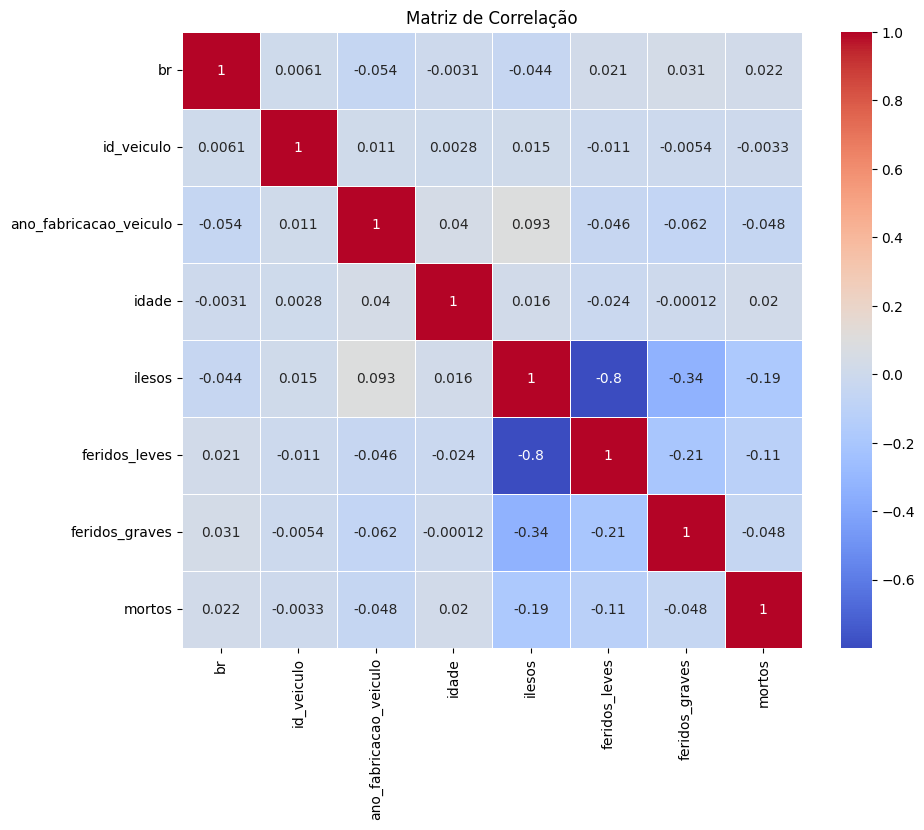

In [20]:
# Matriz corelação

df_numeric = dataset.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numeric.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

In [22]:
# Definir o limite de correlação
threshold = 0.5

correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_pairs = correlation_pairs[(correlation_pairs['Correlation'].abs() > threshold) & 
                                 (correlation_pairs['Variable 1'] != correlation_pairs['Variable 2'])]

print("Pares de variáveis com correlação forte:")
print(strong_pairs.sort_values(by='Correlation', ascending=False))

Pares de variáveis com correlação forte:
       Variable 1     Variable 2  Correlation
37         ilesos  feridos_leves    -0.799804
44  feridos_leves         ilesos    -0.799804
